In [284]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA

## 

In [32]:
mining = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv')

for i in range(1, mining.shape[1]):
    cols = mining.columns.to_list()
    mining[cols[i]] = mining[cols[i]].str.replace(',', '').astype(float)
for i in [1, 2, 4, 5, 22, 23]:
    cols = mining.columns.to_list()
    mining[cols[i]] = mining[cols[i]] / 100
label = mining['% Silica Concentrate']
data_min = mining.drop(columns = ['date', '% Iron Concentrate', '% Silica Concentrate'])

### a.

In [138]:
con_data = sm.add_constant(data_min, prepend = False)
model1 = sm.OLS(label, con_data)
result1 = model1.fit()
table1 = result1.summary().tables[1]
result_df = pd.DataFrame.from_records(table1.data)
result_df = result_df.rename(columns = result_df.loc[0]).iloc[1:, :5]
result_df.t = result_df.t.astype(float)
result_df['abs_t'] = result_df.t.abs()
final_df = result_df.sort_values(['abs_t'], ascending = False).reset_index(drop = True)
final_df

,,coef,std err,t,P>|t|,abs_t
0,Flotation Column 03 Level,3.789e-06,7.05e-08,53.746,0.000,53.746
1,Flotation Column 03 Air Flow,4.511e-05,8.65e-07,52.125,0.000,52.125
2,Flotation Column 06 Air Flow,-2.231e-05,7.37e-07,-30.256,0.000,30.256
3,const,1.431e+07,5.68e+05,25.173,0.000,25.173
4,Flotation Column 05 Air Flow,4.55e-06,1.86e-07,24.490,0.000,24.490
5,Ore Pulp Flow,-0.0002,9.34e-06,-21.546,0.000,21.546
6,Flotation Column 04 Level,-4.138e-06,1.92e-07,-21.540,0.000,21.540
7,Ore Pulp pH,0.0002,9.64e-06,20.491,0.000,20.491
8,Flotation Column 04 Air Flow,3.605e-06,1.82e-07,19.790,0.000,19.790
9,Starch Flow,-4.615e-07,2.6e-08,-17.720,0.000,17.720


### b.

In [143]:
clf1 = LinearRegression()
sfs1 = sfs(clf1, k_features = 'best', forward = True, scoring = 'neg_mean_squared_error', cv = 5)
sfs1 = sfs1.fit(data_min, label)
sub_feature = sfs1.k_feature_names_
sub_feature

('Starch Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow')

### f.

In [164]:
clf2 = Ridge(normalize = True)
clf2.fit(data_min, label)
ridge_df = pd.DataFrame(dict(feature_ridge = data_min.columns, coef_ridge = clf2.coef_))
ridge_df['abs_coef'] = ridge_df.coef_ridge.abs()
ridge_df = ridge_df.sort_values(['abs_coef'], ascending = False).reset_index(drop = True)
del ridge_df['abs_coef']
ridge_df

,feature_ridge,coef_ridge
0,% Silica Feed,1.758108e+05
1,% Iron Feed,2.000786e+04
2,Ore Pulp pH,8.646587e-05
3,Amina Flow,-7.038663e-05
4,Ore Pulp Flow,-7.001255e-05
5,Ore Pulp Density,-6.796432e-05
6,Flotation Column 03 Air Flow,1.110304e-05
7,Flotation Column 06 Air Flow,-9.929606e-06
8,Flotation Column 07 Air Flow,-3.885049e-06
9,Flotation Column 01 Air Flow,3.435094e-06


### g.

In [165]:
clf3 = Lasso(normalize = True)
clf3.fit(data_min, label)
lasso_df = pd.DataFrame(dict(feature_lasso = data_min.columns, coef_lasso = clf3.coef_))
lasso_df['abs_coef'] = lasso_df.coef_lasso.abs()
lasso_df = lasso_df.sort_values(['abs_coef'], ascending = False).reset_index(drop = True)
del lasso_df['abs_coef']
lasso_df

,feature_lasso,coef_lasso
0,% Silica Feed,2.958999e+05
1,% Iron Feed,7.318954e+04
2,Amina Flow,-2.326183e-04
3,Ore Pulp Flow,-2.010900e-04
4,Ore Pulp pH,1.975127e-04
5,Ore Pulp Density,-6.062859e-05
6,Flotation Column 03 Air Flow,4.508247e-05
7,Flotation Column 06 Air Flow,-2.230967e-05
8,Flotation Column 01 Air Flow,-1.343038e-05
9,Flotation Column 07 Air Flow,-7.743360e-06


### h.

In [166]:
clf4 = ElasticNet(normalize = True)
clf4.fit(data_min, label)
net_df = pd.DataFrame(dict(feature_net = data_min.columns, coef_net = clf4.coef_))
net_df['abs_coef'] = net_df.coef_net.abs()
net_df = net_df.sort_values(['abs_coef'], ascending = False).reset_index(drop = True)
del net_df['abs_coef']
net_df

,feature_net,coef_net
0,% Silica Feed,1.263582e+00
1,% Iron Feed,-4.579881e-02
2,Ore Pulp pH,5.114714e-10
3,Ore Pulp Density,-1.495604e-10
4,Ore Pulp Flow,-1.258904e-10
5,Amina Flow,-1.151141e-10
6,Flotation Column 03 Air Flow,6.713942e-11
7,Flotation Column 01 Air Flow,4.431556e-11
8,Flotation Column 02 Air Flow,3.503732e-11
9,Flotation Column 06 Air Flow,-2.955106e-11


### i.

In [163]:
three_df = pd.concat([ridge_df, lasso_df, net_df], axis = 1)
three_df

,feature_ridge,coef_ridge,feature_lasso,coef_lasso,feature_net,coef_net
0,% Silica Feed,1.758108e+05,% Silica Feed,2.958999e+05,% Silica Feed,1.263582e+00
1,% Iron Feed,2.000786e+04,% Iron Feed,7.318954e+04,% Iron Feed,-4.579881e-02
2,Ore Pulp pH,8.646587e-05,Amina Flow,-2.326183e-04,Ore Pulp pH,5.114714e-10
3,Amina Flow,-7.038663e-05,Ore Pulp Flow,-2.010900e-04,Ore Pulp Density,-1.495604e-10
4,Ore Pulp Flow,-7.001255e-05,Ore Pulp pH,1.975127e-04,Ore Pulp Flow,-1.258904e-10
5,Ore Pulp Density,-6.796432e-05,Ore Pulp Density,-6.062859e-05,Amina Flow,-1.151141e-10
6,Flotation Column 03 Air Flow,1.110304e-05,Flotation Column 03 Air Flow,4.508247e-05,Flotation Column 03 Air Flow,6.713942e-11
7,Flotation Column 06 Air Flow,-9.929606e-06,Flotation Column 06 Air Flow,-2.230967e-05,Flotation Column 01 Air Flow,4.431556e-11
8,Flotation Column 07 Air Flow,-3.885049e-06,Flotation Column 01 Air Flow,-1.343038e-05,Flotation Column 02 Air Flow,3.503732e-11
9,Flotation Column 01 Air Flow,3.435094e-06,Flotation Column 07 Air Flow,-7.743360e-06,Flotation Column 06 Air Flow,-2.955106e-11


### k.

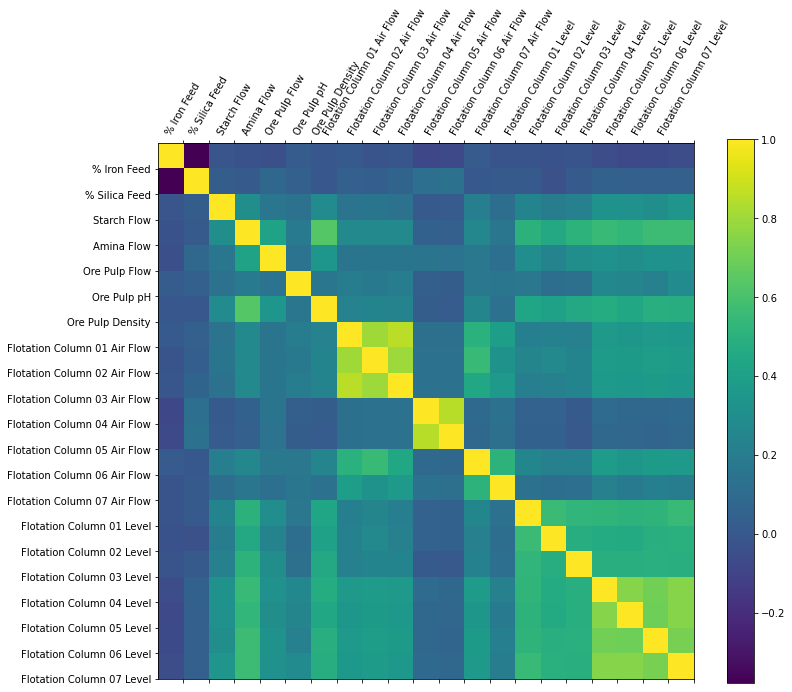

In [227]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()
cax = ax.matshow(data_min.corr())
ax.xaxis.set_ticks(np.arange(0.5, len(data_min.columns), 1))
ax.yaxis.set_ticks(np.arange(0.5, len(data_min.columns), 1))
ax.set_xticklabels(data_min.columns.to_list(), rotation = 60)
ax.set_yticklabels(data_min.columns.to_list())
fig.colorbar(cax)

## 

In [275]:
colname = pd.read_excel('MDS_Assignment2_Steelplates.xlsx', sheet_name = 0, header = None)
colname = pd.Series(colname[colname.columns.to_list()[0]])
steel = pd.read_excel('MDS_Assignment2_Steelplates.xlsx', sheet_name = 1, header = None)
steel.columns = colname
steel_y = pd.get_dummies(steel.iloc[:, -7:]).idxmax(1)
steel_x = steel.iloc[:, :-7]

### a.

In [259]:
bump_y = (steel_y == 'Bumps')
bump_x = steel_x.copy()
random_num = random.sample(list(range(len(bump_y))), len(bump_y))
train_ratio = 0.75
train_count = int(train_ratio*len(bump_y))
train_index = random_num[: train_count]
test_index = random_num[train_count:]
train_x = bump_x.loc[train_index].reset_index(drop = True)
train_y = bump_y[train_index].reset_index(drop = True)
test_x = bump_x.loc[test_index].reset_index(drop = True)
test_y = bump_y[test_index].reset_index(drop = True)

In [274]:
logistic = sm.Logit(train_y, train_x).fit()
yhat = logistic.predict(test_x)
TP = sum((yhat >= 0.5) & (test_y == 1))
FN = sum((yhat < 0.5) & (test_y == 1))
FP = sum((yhat >= 0.5) & (test_y == 0))
TN = sum((yhat < 0.5) & (test_y == 0))
print('\nTP:', TP, '\nFP:', FP, '\nFN:', FN, '\nTN:', TN, '\nAccuracy:', (TP+TN)/(TP+TN+FP+FN))

Optimization terminated successfully.
         Current function value: 0.341799
         Iterations 12

TP: 51 
FP: 16 
FN: 72 
TN: 347 
Accuracy: 0.8189300411522634


C:\Users\user\anaconda3\envs\aging\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


### c.

In [281]:
train_df = train_x.drop(columns = ['TypeOfSteel_A300', 'TypeOfSteel_A400'])
train_std = train_df.apply(lambda x: (np.mean(x) - x) / np.std(x))
test_df = test_x.drop(columns = ['TypeOfSteel_A300', 'TypeOfSteel_A400'])
test_std = test_df.apply(lambda x: (np.mean(x) - x) / np.std(x))

In [317]:
pca = PCA()
pca.fit(train_std)
value = pca.explained_variance_
eigenvector = pd.DataFrame(pca.components_)
print(value)
eigenvector

[8.04440601e+00 3.45863601e+00 2.43803930e+00 2.25510369e+00
 1.80916594e+00 1.53475588e+00 9.93603611e-01 9.23506446e-01
 8.67037271e-01 7.28262240e-01 5.88114872e-01 4.11501148e-01
 2.87258513e-01 2.39281561e-01 1.77830381e-01 8.71954304e-02
 6.12479729e-02 5.38104007e-02 3.82739415e-02 1.18879893e-02
 6.39801602e-03 1.36490298e-03 4.98334379e-04 1.40933030e-05
 3.38722827e-11]


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.187665,0.150753,-0.018365,-0.018403,-0.286063,-0.263698,-0.179455,-0.300358,0.228209,-0.005893,...,-0.271416,0.153972,0.256949,8.466267e-02,-0.324287,-0.314575,-0.277077,8.914501e-02,0.053367,-2.752977e-01
1,-0.080054,-0.059242,0.075394,0.075371,-0.011517,-0.022972,-0.069418,0.004916,0.164568,0.265042,...,0.146963,0.345826,-0.245586,-4.102515e-01,-0.072382,0.141815,-0.270598,-4.645023e-01,0.289720,-1.253013e-01
2,-0.018490,-0.006564,0.294798,0.294708,-0.238945,-0.276932,-0.323067,-0.208049,-0.276037,-0.409725,...,0.076486,0.100492,-0.091590,-1.484101e-01,0.082764,0.127691,-0.018863,-1.592107e-01,-0.404400,1.139739e-01
3,-0.292027,-0.304334,-0.376831,-0.376927,-0.265852,-0.296956,-0.358219,-0.209152,0.104657,0.094805,...,0.011883,-0.135236,-0.109612,-2.731895e-03,0.078562,0.072331,0.078080,1.416682e-02,0.138010,1.721059e-01
4,0.187892,0.214014,-0.479029,-0.479013,0.076060,0.063965,0.049519,0.070500,-0.220787,-0.236392,...,0.094795,0.203666,-0.069787,-1.920176e-01,-0.020505,0.065555,-0.114084,-2.070707e-01,-0.264798,-7.649233e-02
5,0.504390,0.548900,0.040559,0.040510,-0.108719,-0.103389,-0.163932,-0.068276,0.115854,0.173664,...,0.113830,-0.180840,-0.183096,-2.839504e-02,0.120900,0.144195,0.127376,-1.663364e-02,0.182972,2.220576e-01
6,0.010767,0.026101,-0.046757,-0.046844,-0.029238,-0.132915,-0.273760,0.071255,-0.224654,0.254033,...,0.079264,-0.010587,0.046212,2.144450e-01,0.212736,0.095099,0.153736,1.133979e-01,0.139422,6.219057e-02
7,0.135738,0.126012,-0.108059,-0.108073,-0.013518,-0.010649,-0.042072,0.004642,0.012581,-0.227966,...,-0.085201,-0.157652,0.015127,4.895934e-02,-0.086402,-0.064522,-0.010063,4.716960e-02,-0.109657,-5.703379e-02
8,0.151642,0.174036,-0.108583,-0.108562,0.028170,0.003018,0.052017,0.000432,-0.031138,0.067822,...,0.098457,0.115978,0.048845,1.666341e-02,0.007863,-0.052381,-0.025534,2.654620e-02,0.021489,-5.615650e-02
9,0.045958,0.051000,0.074954,0.074935,0.006557,-0.004955,-0.050758,0.034478,0.084845,0.084471,...,0.012731,0.004344,-0.048052,5.963678e-02,-0.058958,-0.017466,-0.073926,-9.219436e-03,0.116619,-1.474271e-01


### d.

Text(0.5, 1.0, 'Eigenvalue of PCs')

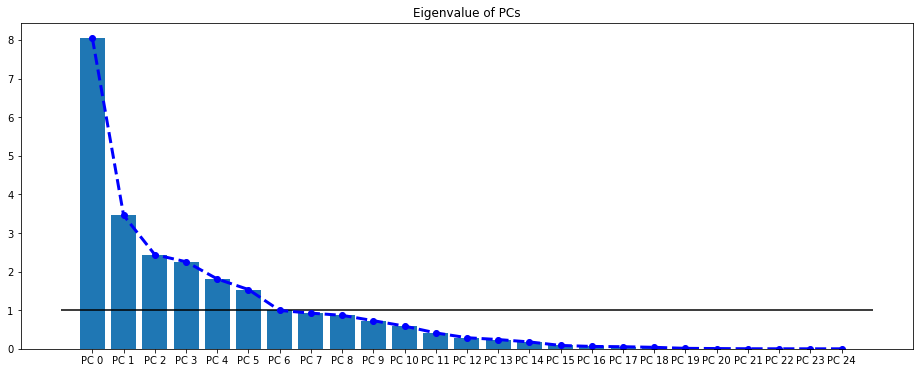

In [329]:
xlabel = ['PC' + ' ' + str(x) for x in range(len(value))]
fig = plt.figure(figsize = (16, 6))
plt.bar(xlabel, value)
plt.plot(range(len(value)), value, '--bo', linewidth = 3)
plt.hlines(1, -1, len(value), color = 'black')
plt.title('Eigenvalue of PCs')

### e.

In [333]:
pca_6 = PCA(n_components = 6)
train_pc6 = pd.DataFrame(pca_6.fit_transform(train_std))
test_pc6 = pca_6.transform(test_std)

In [334]:
logistic = sm.Logit(train_y, train_pc6).fit()
yhat = logistic.predict(test_pc6)
TP = sum((yhat >= 0.5) & (test_y == 1))
FN = sum((yhat < 0.5) & (test_y == 1))
FP = sum((yhat >= 0.5) & (test_y == 0))
TN = sum((yhat < 0.5) & (test_y == 0))
print('\nTP:', TP, '\nFP:', FP, '\nFN:', FN, '\nTN:', TN, '\nAccuracy:', (TP+TN)/(TP+TN+FP+FN))

Optimization terminated successfully.
         Current function value: 0.654641
         Iterations 5

TP: 104 
FP: 155 
FN: 19 
TN: 208 
Accuracy: 0.6419753086419753
